In [1]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pickle

In [3]:
import pandas as pd

In [4]:
import random

In [5]:
with open('train.p', 'rb') as f:
    train_data = pickle.load(f)

with open('valid.p', 'rb') as f:
    valid_data = pickle.load(f)

with open('test.p', 'rb') as f:
    test_data = pickle.load(f)

print(type(train_data))

<class 'dict'>


In [6]:
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']


In [7]:
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(12630, 32, 32, 3)
(34799, 32, 32, 3)
(4410, 32, 32, 3)


In [8]:
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to number of labels '
assert(X_valid.shape[0] == y_valid.shape[0]), 'The number of images is not equal to number of labels '
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to number of labels '

assert(X_train.shape[1:] == (32,32,3)), "The dimensions of image are not 32,32,3"
assert(X_valid.shape[1:] == (32,32,3)), "The dimensions of image are not 32,32,3"
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of image are not 32,32,3"

In [9]:
data = pd.read_csv('signnames.csv')

In [10]:
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

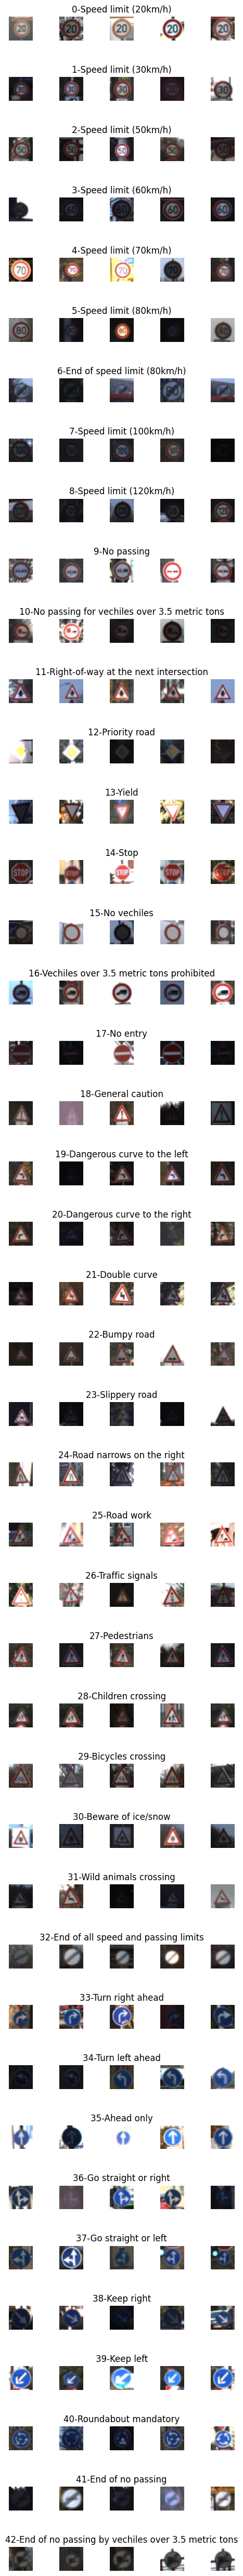

In [12]:
num_of_samples = []

cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))


    

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


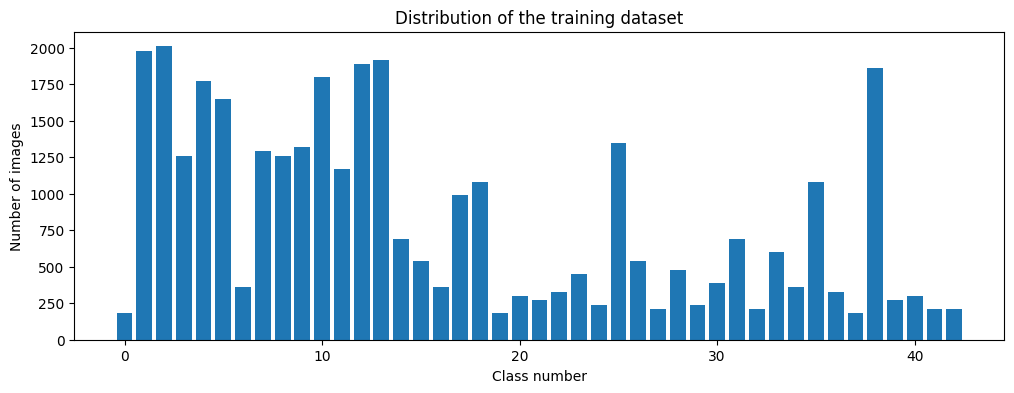

In [13]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


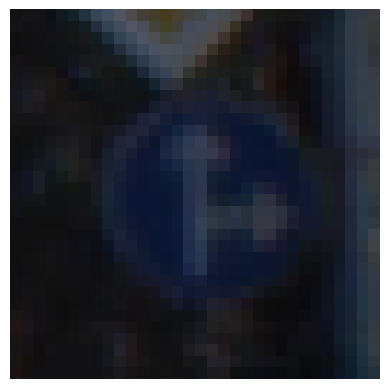

In [14]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


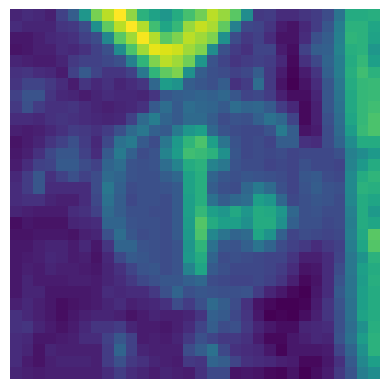

In [15]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")

print(img.shape)


(32, 32)


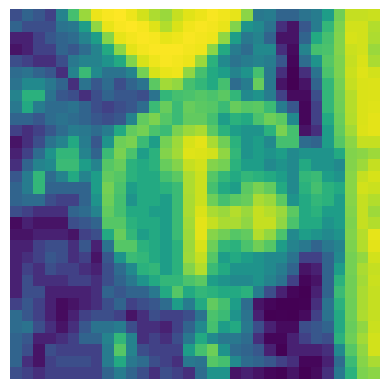

In [16]:
def equalize(img):
   img = cv2.equalizeHist(img)
   return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [17]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255

    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_valid = np.array(list(map(preprocessing, X_valid)))

(34799, 32, 32)


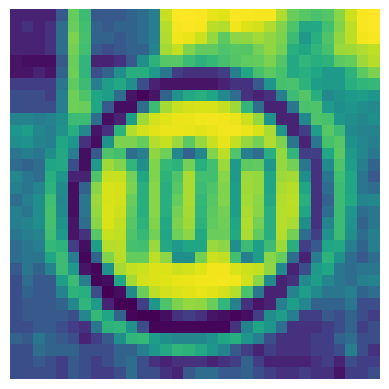

In [18]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

In [19]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_valid = X_valid.reshape(4410, 32, 32, 1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [20]:
y_train = to_categorical(y_train, 43)   
y_test = to_categorical(y_test, 43)
y_valid = to_categorical(y_valid, 43)